In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
print(os.listdir(("/content/drive/MyDrive/Gluacoma_data_set")))

['train', 'test']


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
# print(train_datagen)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Gluacoma_data_set/train',
target_size = (256,256),
batch_size = 40,
class_mode = 'binary')
# print(test_datagen)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Gluacoma_data_set/test',
target_size = (256,256),
batch_size = 40,
class_mode = 'binary')

Found 455 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [ ]:
batch_size=40
model_info=classifier.fit_generator(training_set,
steps_per_epoch = 455/batch_size,
epochs = 75,
validation_data = test_set,
validation_steps = 40/batch_size)


In [ ]:
### Performance evaluation
#########################
score = classifier.evaluate_generator(test_set,40/batch_size)
print(" Total: ", len(test_set.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])
#print("Accuracy = ",score[1])

<ipython-input-9-3fa260b8e9c2>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = classifier.evaluate_generator(test_set,40/batch_size)


 Total:  64
Loss:  0.024020254611968994 Accuracy:  1.0


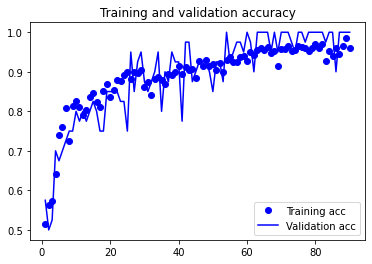

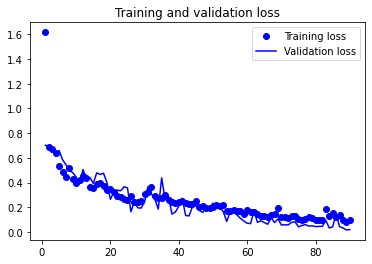

In [ ]:
from matplotlib import lines
from pyparsing import line
import matplotlib.pyplot as plt

acc = model_info.history['accuracy']
val_acc = model_info.history['val_accuracy']
loss = model_info.history['loss']
val_loss = model_info.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
classifier.save('classifier.h5')

In [ ]:
import os
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import numpy as np
import cv2

In [ ]:
target_size = (256,256)
model=load_model('classifier.h5')
print("model loaded")

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Gluacoma_data_set/test/test_class 0/Im007.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")